In [33]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
!pwd

/home/kaan/Desktop/Python/inzva/Palm-Fiction


In [35]:
curr_path = os.getcwd()
dataset = os.path.join(curr_path,"Processed_Imgs")
bounding_boxes = os.path.join(curr_path,"Processed_Bounds",)
joints_path = os.path.join(curr_path,"Processed_Joints")

dataset,bounding_boxes,joints_path

('/home/kaan/Desktop/Python/inzva/Palm-Fiction/Processed_Imgs',
 '/home/kaan/Desktop/Python/inzva/Palm-Fiction/Processed_Bounds',
 '/home/kaan/Desktop/Python/inzva/Palm-Fiction/Processed_Joints')

In [36]:
def get_bound_width_heght(bound):
  width = bound.loc['top_right']['x'] - bound.loc['top_left']['x']
  height =  bound.loc['bottom_left']['y'] - bound.loc['top_left']['y']
  return width,height

In [37]:
def get_bound(path):
    return pd.read_pickle(path)

In [38]:
def get_joints(path):
    return pd.read_pickle(path)

In [39]:
def get_img(path):
  img = plt.imread(path)
  return img

In [40]:
def get_item(index):
  if index == -1:
    index = random.randint(0,600)
  sample_img = os.path.join(dataset,str(index)+".jpg")
  sample_joints = os.path.join(joints_path,str(index)+".pkl")
  sample_bound = os.path.join(bounding_boxes,str(index)+".pkl")
  #print(index)
  #===============================================================#
  img = get_img(sample_img)
  #===============================================================#
  joints = get_joints(sample_joints)
  #===============================================================#
  bound_df = get_bound(sample_bound)
  #===============================================================#
  return img,joints,bound_df

In [41]:
img,joints,bound_df = get_item(-1)

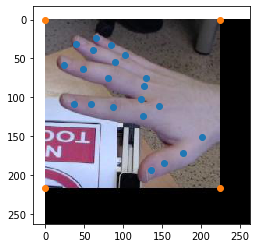

In [42]:
plt.imshow(img)
plt.scatter(joints['x'],joints['y'])
plt.scatter(bound_df['x'],bound_df['y'])

In [43]:
import torch
import torchvision
from torchvision import datasets, transforms

In [44]:
transformOps = transforms.Compose([
    transforms.ToTensor()
])

In [45]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class PalmFiction():
    IMG_Swidt =m 
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)


NameError: name 'm' is not defined

In [46]:
train = CustomDataset(train=True, transformOps)
test = CustomDataset(train=False, transformOps)

SyntaxError: positional argument follows keyword argument (<ipython-input-46-e7596e8742d6>, line 1)

In [47]:
from PIL import Image

In [48]:
transformDefault = transforms.Compose([
    lambda img: transforms.functional.rotate(img, -90),
    lambda img: transforms.functional.hflip(img),
    transforms.ToTensor()
])

In [93]:
def get_dataset_urls():
    return [url.split('.')[0] for url in os.listdir(dataset)]


In [94]:
def train_test_split(test_size=0.2):
    urls = get_dataset_urls()
    np.random.shuffle(urls)
    
    slc = int(len(urls)*test_size)
    train = urls[slc:]
    test = urls[:slc]
    return train,test

In [57]:
import cv2

In [95]:
class PalmFiction(torch.utils.data.Dataset):
    def __init__(self,urls,transform=transformDefault,target_transform=None,** kwargs):
        self.transform = transform
        self.target_transform = target_transform
        self.urls = urls
        #self.data contains all img urls
        self.data = []
        #self.targets contains all joints urls
        self.targets = []
        for url in self.urls:
            print(url)
            img_path = os.path.join(dataset,url + ".jpg")
            target_path = os.path.join(joints_path,url + ".pkl")
            self.data.append(img_path)
            self.targets.append(target_path)
        width_height = pd.read_csv("width_height.txt")
        self.width = width_height['width'][0]
        self.height = width_height['height'][0]           
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        img_path, target_path = self.data[index], self.targets[index]
        
        img = plt.imread(img_path)
        img = Image.fromarray(img, mode='L')
        #img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        #imrsz = cv2.resize(img, (self.width, self.height))

        plt.imshow(img)
        plt.show()
        target = pd.read_pickle(target_url)
        print("##"*10)
        print(target)
        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

In [96]:
train,test = train_test_split()
a = PalmFiction(train)
b = PalmFiction(test)

204
363
127
689
483
246
83
52
200
419
355
208
510
528
350
321
28
385
261
244
701
446
417
103
512
270
333
70
299
187
614
660
3
382
568
524
290
105
647
98
277
138
243
67
254
148
79
473
15
624
698
313
674
248
514
488
500
390
8
190
611
499
448
155
495
588
654
184
87
35
89
177
478
564
195
594
648
492
706
11
679
82
592
56
565
191
394
340
693
24
90
547
526
673
484
40
474
362
682
401
541
637
88
380
80
21
242
228
141
668
598
215
4
615
288
23
69
429
159
540
443
670
330
518
92
258
207
165
134
323
504
438
344
364
121
280
464
402
628
651
531
574
530
359
227
335
543
685
506
621
260
44
425
250
384
222
46
133
273
59
147
111
327
511
656
115
471
158
678
34
136
513
50
114
274
397
493
680
439
667
129
61
408
119
626
153
230
463
393
687
646
167
497
305
427
640
502
41
311
173
593
74
318
515
454
289
433
10
485
37
224
545
405
99
376
652
265
361
491
65
197
298
581
607
267
43
308
202
702
379
557
81
237
462
117
309
130
620
14
422
606
671
691
529
455
676
381
2
583
595
316
360
411
47
522
150
503
337
171
558
123
279

In [97]:
x = a[2]

ValueError: Too many dimensions: 3 > 2.